In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from dotenv import load_dotenv
import os

In [2]:
load_dotenv()

True

In [3]:
dir_name = os.getenv('DIR_NAME')
base_path = f'../../data/processed/{dir_name}'
os.makedirs(base_path, exist_ok=True)

res_path = f'../../data/results/{dir_name}'
os.makedirs(res_path, exist_ok=True)

# Load data from CSV file
starred_data = pd.read_csv(f'{base_path}/starred.csv', encoding='latin1')
users_data = pd.read_csv(f'{base_path}/users_data.csv', encoding='latin1')

In [4]:
# Check the first rows of the data
print(starred_data.head())
print('---------------------------------------------')

# Check the number of rows and columns of the data
print(f"Number of rows: {starred_data.shape[0]}")
print(f"Number of columns: {starred_data.shape[1]}")
print('---------------------------------------------')

# Check for null values in the data
print(starred_data.duplicated().sum())
print('---------------------------------------------')

# Check the data types of the columns
print(starred_data.dtypes)


   user_id  has_moz_owner    fav_lang     fav_topic
0   404506           True        Ruby     accordion
1   705308           True         PHP           php
2   755840           True         PHP           php
3   858200          False  TypeScript  autocomplete
4   943711           True        Ruby           NaN
---------------------------------------------
Number of rows: 774
Number of columns: 4
---------------------------------------------
0
---------------------------------------------
user_id           int64
has_moz_owner      bool
fav_lang         object
fav_topic        object
dtype: object


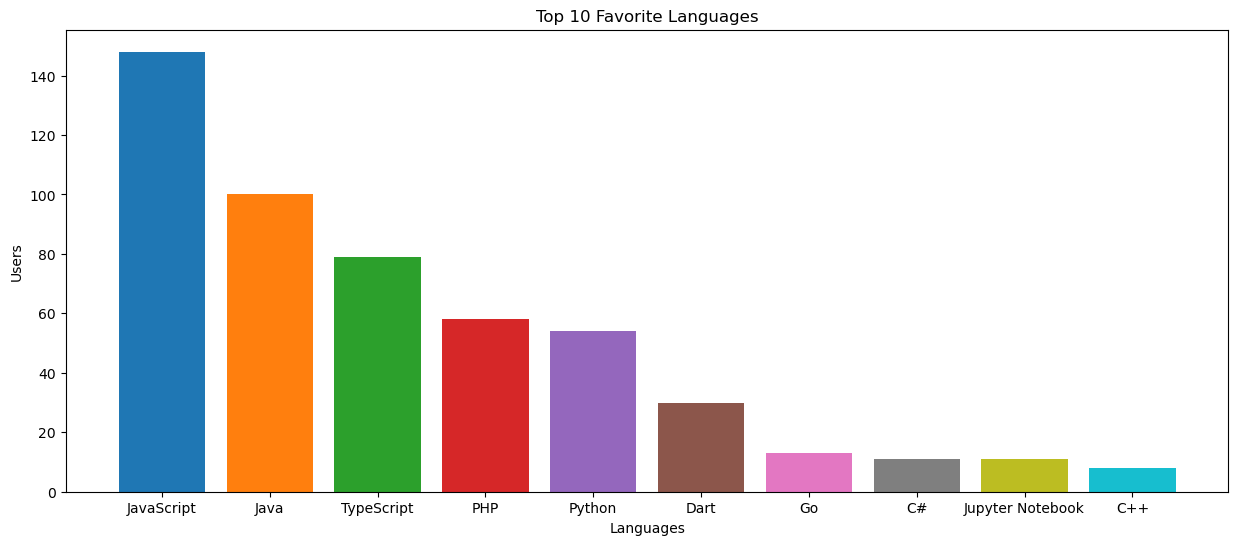

In [5]:
# Array with the preferred languages of a single user
# Remove null values, HTML and CSS so as not to interfere with programming languages
starred_data['fav_lang'] = starred_data['fav_lang'].drop(starred_data[starred_data['fav_lang'] == 'HTML'].index)
starred_data['fav_lang'] = starred_data['fav_lang'].drop(starred_data[starred_data['fav_lang'] == 'CSS'].index)
preferred_languages = starred_data['fav_lang'].dropna()

# Counting the occurrences of each language
language_counts = Counter(preferred_languages)

# Getting the most liked languages
top_5_languages = language_counts.most_common(10)

# Separating the languages and their counts
languages, counts = zip(*top_5_languages)

# Setting colors for each language
colors = plt.cm.tab10.colors[:len(languages)]

plt.figure(figsize=(15, 6))

# Creating the bar chart
title = 'Top 10 Favorite Languages'
plt.bar(languages, counts, color=colors)
plt.xlabel('Languages')
plt.ylabel('Users')
plt.title(title)
plt.savefig(f'{res_path}/{title.lower().replace(" ", "_")}.png')
plt.show()


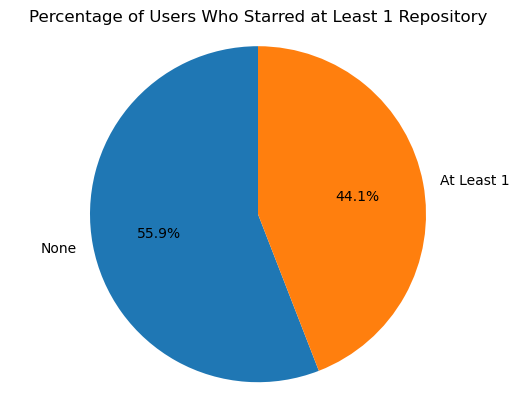

In [6]:
# Calculate the percentage of users who liked at least 1 repository
liked = (starred_data.shape[0] / users_data.shape[0]) * 100
not_liked = 100 - liked

# Create a pie chart
labels = ['None', 'At Least 1']
values = [not_liked, liked]

title = 'Percentage of Users Who Starred at Least 1 Repository'
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title(title)
plt.savefig(f'{res_path}/{title.lower().replace(" ", "_")}.png')
plt.show()


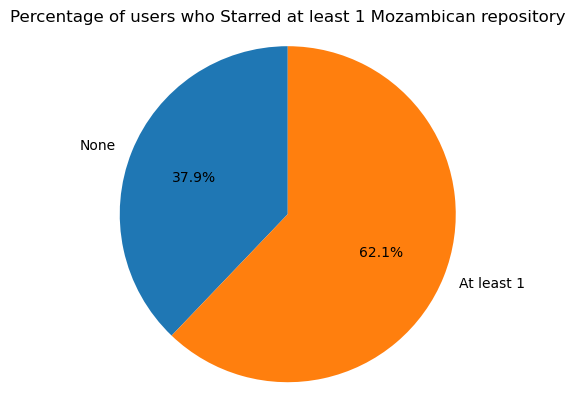

In [7]:
liked_moz_repos = starred_data['has_moz_owner'].sum()

# Calculate the percentage of users who liked at least 1 Mozambican repository
liked_percentage = (liked_moz_repos / starred_data.shape[0]) * 100
not_liked_percentage = 100 - liked_percentage

# Create a pie chart
labels = ['None', 'At least 1']
values = [not_liked_percentage, liked_percentage]

title = 'Percentage of users who Starred at least 1 Mozambican repository'
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title(title)
plt.savefig(f'{res_path}/{title.lower().replace(" ", "_")}.png')
plt.show()


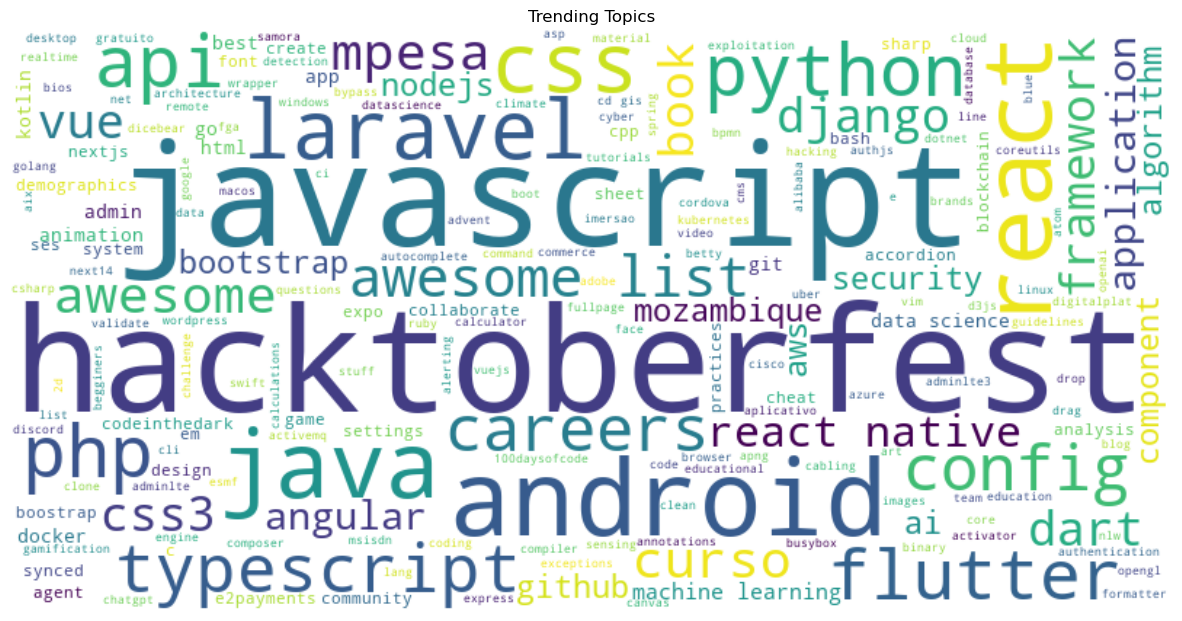

In [8]:
# starred_data = pd.read_csv('data/starred_data.csv', encoding='latin1')

# Trending topic data
fav_topic = starred_data['fav_topic'].dropna()
fav_topic = fav_topic.values.tolist()

# Creating the wordcloud
text = ' '.join(fav_topic)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plotting the wordcloud
title = 'Trending Topics'
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(title)
plt.savefig(f'{res_path}/{title.lower().replace(" ", "_")}.png')

plt.show()
